# 04.03 - Exploratory Data Analysis Report - Key Points

 + Imports & Setup
 + Load Data
 + Demand Overview
 + Weather Data Overview
 + Select an arbitrary year -2006 - and examine the data
 + What is the impact of Temperature on Demand?
 + What is the impact of Day of the Week on Demand?
 + What is the impact of Hour of the Day on Demand?
 + What does power demand look like over a typical week?
 + Summary

## Imports & setup

In [1]:
import pathlib
#import datetime
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('grayscale')
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import palettable
import seaborn as sns

%matplotlib inline

PROJECT_DIR = pathlib.Path.cwd().parent.resolve()
CLEAN_DATA_DIR = PROJECT_DIR / 'data'/ '05-clean'

# Plotting Setup
plt.style.use('grayscale')
# Custom Overrides to grayscale
params = {'legend.fontsize': 'x-large',
          'lines.linewidth': 0.75,
      'figure.figsize': (15, 7),
          'grid.color': 'white',
          'axes.axisbelow': False,
          'axes.grid': True,
          'axes.grid.axis': 'y',
     'axes.labelsize': 'x-large',
     'axes.titlesize':'xx-large',
     'xtick.labelsize':'x-large',
     'ytick.labelsize':'x-large'}
plt.rcParams.update(params)
figsize=(15,7)
colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
sns.set_palette(sns.xkcd_palette(colors))

## Load Data

In [2]:
dtypes = {'temp': np.float64, 'dew_point_temp':np.float64, 'rel_hum':np.float64,
          'wind_speed': np.float64, 'visibility': np.float64, 'press': np.float64,
          'hmdx': np.float64, 'wind_chill': np.float64, 'weather': np.object,
         'hour_of_day': np.float64, 'year': np.float64, 'month': np.float64,
         'day_of_week': np.float64, 'day_of_year': np.float64, 'week_of_year': np.float64,
          'quarter': np.float64, 'stat_hol': 'category', 'day_light_hours': 'category',
          'hourly_demand': np.float64, 'daily_peak': np.float64}

df_orig = pd.read_csv(CLEAN_DATA_DIR / "clean.csv", parse_dates=True,
                 dtype=dtypes, index_col=0, infer_datetime_format=True)

daymapper = {0.0: 'Mon', 1.0: 'Tue', 2.0: 'Wed', 3.0: 'Thu', 4.0: 'Fri', 5.0: 'Sat', 6.0: 'Sun'}
weekdaymapper = {0.0: 'Weekday', 1.0: 'Weekday', 2.0: 'Weekday', 3.0: 'Weekday', 4.0: 'Weekday',
                 5.0: 'Weekend', 6.0: 'Weekend'}
df_orig['dayofweek'] = df_orig['day_of_week'].map(daymapper)
df_orig['daytype'] = df_orig['day_of_week'].map(weekdaymapper)


In [3]:
df_orig.head()

,temp,dew_point_temp,rel_hum,wind_speed,visibility,press,hmdx,wind_chill,weather,hour_of_day,...,day_of_week,day_of_year,week_of_year,quarter,stat_hol,day_light_hours,hourly_demand,daily_peak,dayofweek,daytype
1994-01-01 00:00:00,-1.2,-3.8,83.0,15.0,19.3,99.91,NaN,-6.0,Cloudy,0.0,...,5.0,1.0,52.0,1.0,True,False,14422.0,16892.0,Sat,Weekend
1994-01-01 01:00:00,-0.9,-3.0,86.0,20.0,16.1,99.91,NaN,-6.0,Cloudy,1.0,...,5.0,1.0,52.0,1.0,True,False,13845.0,16892.0,Sat,Weekend
1994-01-01 02:00:00,-0.7,-3.2,83.0,15.0,16.1,99.87,NaN,-5.0,Cloudy,2.0,...,5.0,1.0,52.0,1.0,True,False,13372.0,16892.0,Sat,Weekend
1994-01-01 03:00:00,-0.8,-2.4,89.0,15.0,12.9,99.81,NaN,-5.0,Cloudy,3.0,...,5.0,1.0,52.0,1.0,True,False,13025.0,16892.0,Sat,Weekend
1994-01-01 04:00:00,-1.0,-3.3,84.0,19.0,16.1,99.77,NaN,-6.0,Mostly Cloudy,4.0,...,5.0,1.0,52.0,1.0,True,False,12869.0,16892.0,Sat,Weekend


## Demand Overview

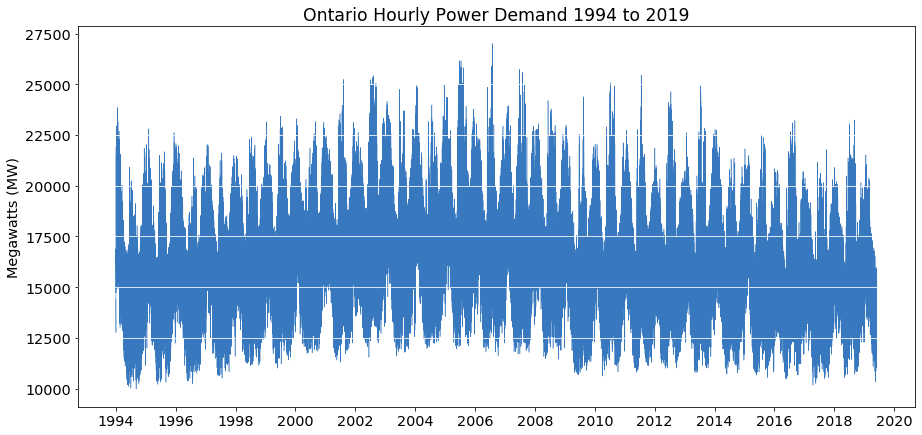

In [4]:
df = df_orig.copy(deep=True)
def single_time_series_plot(some_series: pd.Series, date_format: str, mdates_locator):
    myFmt = DateFormatter(date_format) 

    fig, ax1 = plt.subplots(frameon=False, figsize=figsize)
    ax1.plot(some_series, linewidth=0.5)
    ax1.xaxis.set_major_formatter(myFmt)
    ax1.xaxis.set_major_locator(mdates_locator)
    return fig, ax1

date_format = '%Y'
mdates_locator = mdates.YearLocator(2)
df = df['hourly_demand']
fig, ax = single_time_series_plot(df,
                                  date_format=date_format,
                                  mdates_locator=mdates_locator)
ax.set_title('Ontario Hourly Power Demand 1994 to 2019')
ax.set_ylabel('Megawatts (MW)')
plt.savefig('saved-images/ontario-hourly-power-demand-1994-2019.PNG')
plt.show();

The chart above shows the electrical power demand in Ontario for every hour of every day between January 1st 1994, and June 11th 2019.

## Weather Overview

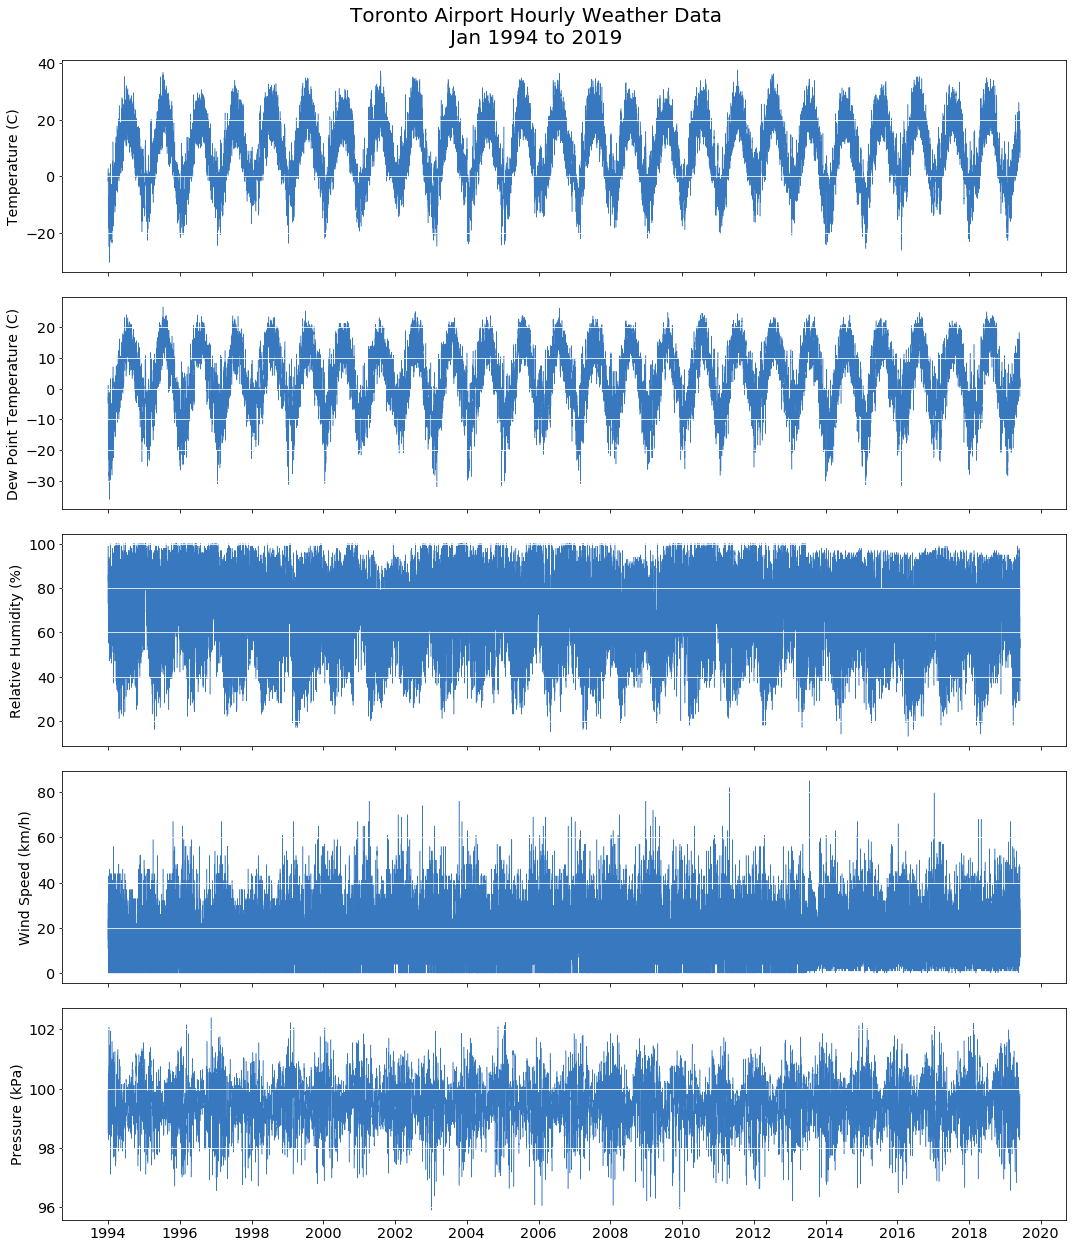

In [5]:
df = df_orig.copy(deep=True)
def multi_time_series_plot(df: pd.DataFrame, date_format: str, mdates_locator, ylabels):
    myFmt = DateFormatter(date_format) 

    fig, axes = plt.subplots(nrows=len(df.columns), ncols=1,
                             frameon=False,
                             figsize = (figsize[0], figsize[1]*2.6),
                            sharex=True)
    for ax, col, ylabel in zip(axes, df.columns, ylabels):
        ax.plot(df[col], linewidth=0.5)
        ax.set_ylabel(ylabel, fontsize=14)
    ax.xaxis.set_major_formatter(myFmt)
    ax.xaxis.set_major_locator(mdates_locator)
    ax.xaxis.set_tick_params(labelbottom=True)
    return fig, axes

date_format = '%Y'
mdates_locator = mdates.YearLocator(2)
df = df[['temp', 'dew_point_temp', 'rel_hum', 'wind_speed', 'press']]
ylabels = ['Temperature (C)', 'Dew Point Temperature (C)',
           'Relative Humidity (%)', 'Wind Speed (km/h)',
          'Pressure (kPa)']
fig, axes = multi_time_series_plot(df,
                                  date_format=date_format,
                                  mdates_locator=mdates_locator, ylabels=ylabels)
plt.suptitle('Toronto Airport Hourly Weather Data\nJan 1994 to 2019', fontsize=20)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('saved-images/toronto-airport-hourly-weather-data-1994-2019.PNG')
plt.show();

The chart above shows various weather data (at Toronto Airport) for every hour of every day between January 1st 1994, and June 11th 2019.

Making sense of the valleys and troughs in the above chart feels a bit overwhelming, so let's choose a
random year, say 2006, and zoom into the details of that year.


## Select an Arbitrary Year - 2006 - and examine the data

Making sense of the valleys and troughs in the above charts feels a bit overwhelming, so let's choose a
random year, say 2006, and zoom into the details of that year.

In [6]:
pd.set_option('display.max_columns', 100)

df2006 = df_orig.loc['2006', :].copy(deep=True)
df2006.head()

,temp,dew_point_temp,rel_hum,wind_speed,visibility,press,hmdx,wind_chill,weather,hour_of_day,year,month,day_of_week,day_of_year,week_of_year,quarter,stat_hol,day_light_hours,hourly_demand,daily_peak,dayofweek,daytype
2006-01-01 00:00:00,-5.2,-7.4,84.0,7.0,19.3,98.90,NaN,-8.0,Cloudy,0.0,2006.0,1.0,6.0,1.0,52.0,1.0,True,False,15925.0,18371.0,Sun,Weekend
2006-01-01 01:00:00,-5.0,-7.0,86.0,0.0,19.3,98.96,NaN,NaN,Cloudy,1.0,2006.0,1.0,6.0,1.0,52.0,1.0,True,False,15323.0,18371.0,Sun,Weekend
2006-01-01 02:00:00,-5.4,-6.3,93.0,4.0,4.0,99.01,NaN,-7.0,Fog,2.0,2006.0,1.0,6.0,1.0,52.0,1.0,True,False,14832.0,18371.0,Sun,Weekend
2006-01-01 03:00:00,-5.0,-5.6,96.0,4.0,2.0,99.05,NaN,-7.0,Fog,3.0,2006.0,1.0,6.0,1.0,52.0,1.0,True,False,14502.0,18371.0,Sun,Weekend
2006-01-01 04:00:00,-4.6,-5.2,96.0,0.0,2.0,99.08,NaN,NaN,Fog,4.0,2006.0,1.0,6.0,1.0,52.0,1.0,True,False,14392.0,18371.0,Sun,Weekend


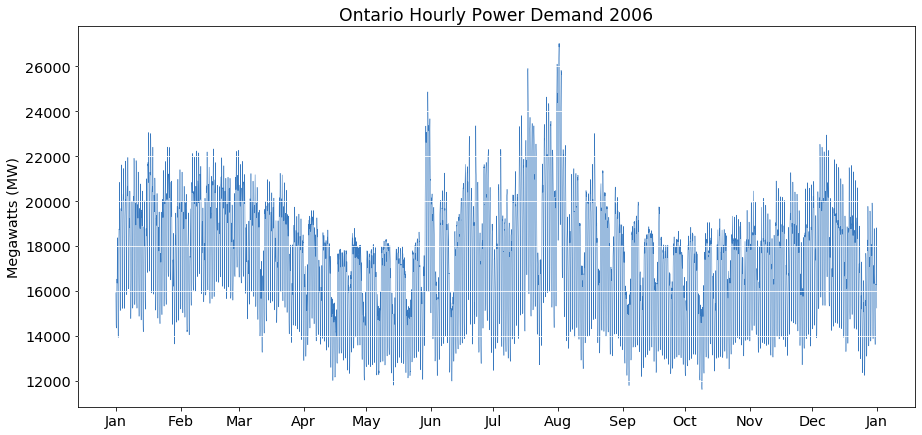

In [7]:
date_format = '%b'
mdates_locator = mdates.MonthLocator()
df = df2006['hourly_demand']
fig, ax = single_time_series_plot(df,
                                  date_format=date_format,
                                  mdates_locator=mdates_locator)
ax.set_title('Ontario Hourly Power Demand 2006')
ax.set_ylabel('Megawatts (MW)')
plt.savefig('saved-images/ontario-hourly-power-demand-2006.PNG')
plt.show();

This is a bit easier to read. It looks like power demand is high in the winters, low in spring and fall, and
very high in summer.

We could reasonably guess that high power usage is related to both cold and hot weather.

We can review this relationship by plotting temperature against power demand.

## What is the impact of Temperature on Demand?

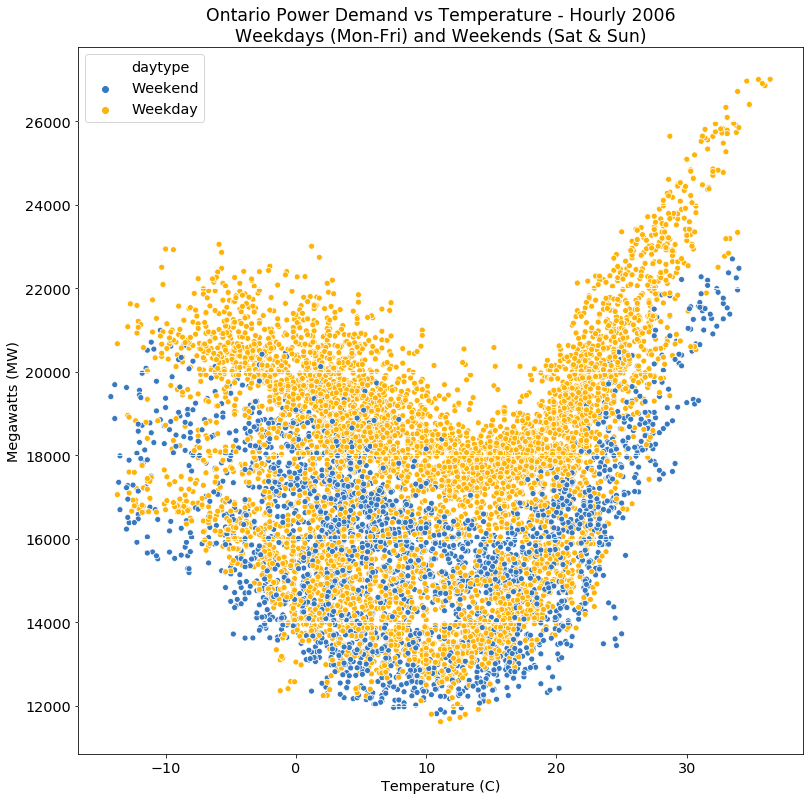

In [8]:

fig, ax = plt.subplots(frameon=False, figsize=(13,13))
sns.scatterplot(x="temp", y="hourly_demand",
                hue="daytype",
                hue_order=['Weekend', 'Weekday'],
                data=df2006, ax=ax, legend='full')
#plt.title('')
ax.set_ylabel('Megawatts (MW)')
ax.set_xlabel('Temperature (C)')
ax.set_title('Ontario Power Demand vs Temperature - Hourly 2006\nWeekdays (Mon-Fri) and Weekends (Sat & Sun)')
plt.savefig('saved-images/ontario-power-demand-vs-temperature-hourly-2006-scatterplot.PNG')
plt.show();

The plot shows that as temperature goes to extreme highs or lows, power demand goes up accordingly.
This makes sense when we realize our heating and cooling systems use electricity, and these systems tend to get
more usage when temperatures are more extreme. Another factor that seems to make a difference is the day of
the week, with higher power demands occurring during the working week.

So, let's look the pattern of daily power usage over a week. We can do this by plotting all 52 weeks of
the year 2006 on the same chart. If there is a weekly pattern, the lines will tend to have a similar shape.

## What is the impact of Day of the Week on Demand?

Stacking the data is a bit more complicated than other timescales because weeks run across years

In [9]:
df2006_daysinweeks_start = df2006[['year', 'week_of_year', 'day_of_week', 'daily_peak']].copy(deep=True)
df2006_daysinweeks_start.drop_duplicates(inplace=True)
df2006_daysinweeks_start.head()

,year,week_of_year,day_of_week,daily_peak
2006-01-01,2006.0,52.0,6.0,18371.0
2006-01-02,2006.0,1.0,0.0,20839.0
2006-01-03,2006.0,1.0,1.0,21610.0
2006-01-04,2006.0,1.0,2.0,21452.0
2006-01-05,2006.0,1.0,3.0,21783.0


In [10]:
df2006_daysinweeks_subset = df2006_daysinweeks_start.iloc[3:]
df2006_daysinweeks_subset.head()

,year,week_of_year,day_of_week,daily_peak
2006-01-04,2006.0,1.0,2.0,21452.0
2006-01-05,2006.0,1.0,3.0,21783.0
2006-01-06,2006.0,1.0,4.0,21941.0
2006-01-07,2006.0,1.0,5.0,20449.0
2006-01-08,2006.0,1.0,6.0,19990.0


In [11]:
df2006_daysinweeks = df2006_daysinweeks_subset.pivot(index='day_of_week',
                                                     columns='week_of_year',
                                                     values='daily_peak')
# create an arbitrary day to use as a datetime axis, so that we can use nice matplotlib labelling
df2006_daysinweeks.index = pd.Index(df2006_daysinweeks_subset.loc['2006-01-09': '2006-01-15'].index,
                                    name='representative days of all weeks')
df2006_daysinweeks.head(8)
## ! Note index is a sample week from 2006 - Used so that the plots x axis can be formatted automatically
# Week Monday 2006 -01-09 to Sun 2006-01-15

week_of_year,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0,45.0,46.0,47.0,48.0,49.0,50.0,51.0,52.0
representative days of all weeks,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2006-01-09,NaN,21905.0,23052.0,21366.0,20971.0,22119.0,22187.0,21928.0,22215.0,21224.0,19990.0,21238.0,19737.0,19334.0,18600.0,17660.0,18573.0,17790.0,17974.0,17870.0,16071.0,23338.0,20036.0,18654.0,22885.0,21628.0,20745.0,20276.0,25898.0,21653.0,26092.0,21200.0,20469.0,20776.0,20627.0,16546.0,18330.0,19743.0,18409.0,18451.0,16252.0,18727.0,19333.0,19590.0,19726.0,20896.0,21267.0,20546.0,22528.0,21845.0,21489.0,16467.0
2006-01-10,NaN,21802.0,23006.0,21765.0,21398.0,21954.0,21511.0,21572.0,22264.0,20887.0,20958.0,21164.0,19321.0,19580.0,18248.0,17869.0,18796.0,17658.0,18225.0,17947.0,17794.0,24857.0,20465.0,19100.0,20579.0,21720.0,22299.0,21321.0,23724.0,23413.0,27005.0,21444.0,20331.0,21350.0,20168.0,18883.0,18528.0,18405.0,18308.0,18838.0,18570.0,19215.0,19293.0,19067.0,20130.0,20570.0,20848.0,20817.0,22398.0,21654.0,21588.0,17681.0
2006-01-11,21452.0,21294.0,22399.0,22404.0,21290.0,22230.0,21107.0,21017.0,21636.0,21173.0,20871.0,20819.0,19424.0,19582.0,18717.0,17708.0,18200.0,17855.0,18303.0,17904.0,18149.0,23662.0,21249.0,19420.0,19772.0,22298.0,19351.0,20313.0,23453.0,24630.0,25816.0,21232.0,20962.0,20391.0,19505.0,19105.0,18863.0,18056.0,18666.0,18586.0,19047.0,18714.0,19379.0,19935.0,19821.0,20194.0,20406.0,20580.0,22194.0,21502.0,21302.0,19768.0
2006-01-12,21783.0,20764.0,21028.0,22390.0,20658.0,22147.0,22321.0,21062.0,21772.0,20613.0,20370.0,20485.0,19212.0,18826.0,18111.0,17812.0,18037.0,18063.0,18124.0,17986.0,18328.0,20320.0,20402.0,20131.0,23349.0,20612.0,19223.0,23319.0,23347.0,24342.0,22292.0,21157.0,21642.0,19761.0,18951.0,19342.0,18687.0,18038.0,18294.0,18452.0,19050.0,18740.0,19192.0,20449.0,19441.0,20174.0,20309.0,20726.0,22941.0,20999.0,20919.0,19560.0
2006-01-13,21941.0,20449.0,20339.0,20894.0,20304.0,21546.0,21714.0,21013.0,21188.0,19601.0,20137.0,19407.0,18499.0,19256.0,15729.0,17792.0,18043.0,17934.0,18015.0,17489.0,18624.0,19726.0,19008.0,20799.0,20844.0,18980.0,20524.0,23802.0,22539.0,23552.0,22481.0,19023.0,23008.0,19282.0,18878.0,19976.0,18545.0,18044.0,17732.0,17748.0,18788.0,18577.0,19069.0,19951.0,19180.0,20031.0,19578.0,20880.0,22258.0,20748.0,20593.0,19917.0
2006-01-14,20449.0,20013.0,19517.0,18571.0,19476.0,19697.0,20709.0,19829.0,18976.0,17328.0,19134.0,18050.0,17104.0,17377.0,15474.0,16689.0,15915.0,15854.0,15919.0,15643.0,16179.0,16864.0,15937.0,21635.0,18587.0,17849.0,19028.0,21868.0,17700.0,22274.0,19296.0,17124.0,19757.0,17068.0,16229.0,16857.0,16564.0,16821.0,16617.0,15884.0,16791.0,16885.0,17489.0,18242.0,18336.0,18307.0,18168.0,19358.0,20123.0,19339.0,18892.0,18780.0
2006-01-15,19990.0,20994.0,19512.0,19470.0,19655.0,20126.0,20647.0,20344.0,19114.0,17794.0,19126.0,18059.0,17181.0,17139.0,15173.0,16879.0,15946.0,15981.0,15708.0,15319.0,17580.0,16609.0,15940.0,21532.0,19004.0,19339.0,18742.0,22702.0,17403.0,20473.0,19414.0,17718.0,16985.0,18424.0,15426.0,16594.0,17292.0,16422.0,16437.0,15384.0,16910.0,17365.0,18207.0,17960.0,18485.0,18837.0,18388.0,20421.0,19730.0,18860.0,17295.0,18813.0


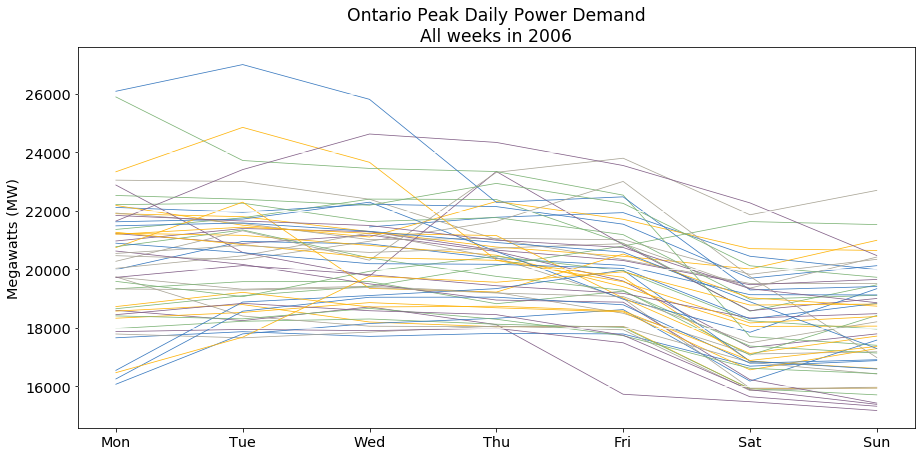

In [12]:
from matplotlib.dates import MO, TU, WE, TH, FR, SA, SU
def seasonal_plot(df: pd.DataFrame, labels: list, date_format: str, mdates_locator):
    """
    If labels is an empty list then no labels attributed to series 
    
    """
    myFmt = DateFormatter(date_format) 
    x = df.index
    seriess = [df[col] for col in df.columns]
    fig, ax1 = plt.subplots(frameon=False, figsize=figsize)
    if len(labels) == 0:
        labels = ['' for l in range(len(df.columns))]
    for series, label in zip(seriess, labels):
        ax1.plot(x, series)
    ax1.xaxis.set_major_formatter(myFmt)
    ax1.xaxis.set_major_locator(mdates_locator)

    return fig, ax1

date_format = '%a'
mdates_locator = mdates.WeekdayLocator(byweekday=(MO, TU, WE, TH, FR, SA, SU))
labels = []
fig, ax = seasonal_plot(df2006_daysinweeks,
                        labels=labels,
                        date_format=date_format,
                        mdates_locator=mdates_locator)
ax.set_title('Ontario Peak Daily Power Demand\nAll weeks in 2006')
ax.set_ylabel('Megawatts (MW)')
#ax.set_xlabel('Day of week')
plt.savefig('saved-images/ontario-peak-daily-power-demand-all-weeks-2006.PNG')
plt.show();

Typically, power usage tends to be higher from Monday to Thursday. It drops slightly on Friday, and then
drops further on Saturday and Sunday.

Therefore, it is a reasonable assumption that as people's activities increase, so does their power usage. And the main activity for a high proportion of people is their work.

## What is the Impact of Hour of the Day on Demand

For many people, their work day starts in the morning and ends in the evening. Thus, we could
hypothesize that if we plotted every day's power usage for 2006 on the same chart, we would see a pattern in
line with most people's working hours.

In [13]:
df2006_hoursindays = df2006.pivot(index='hour_of_day', columns='day_of_year', values='hourly_demand')
# create an arbitrary day to use as a datetime axis, so that we can use nice matplotlib labelling
df2006_hoursindays.index = pd.Index(df2006['2006-01-01'].index, name='hours of all days')
df2006_hoursindays.head()

day_of_year,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0,45.0,46.0,47.0,48.0,49.0,50.0,...,316.0,317.0,318.0,319.0,320.0,321.0,322.0,323.0,324.0,325.0,326.0,327.0,328.0,329.0,330.0,331.0,332.0,333.0,334.0,335.0,336.0,337.0,338.0,339.0,340.0,341.0,342.0,343.0,344.0,345.0,346.0,347.0,348.0,349.0,350.0,351.0,352.0,353.0,354.0,355.0,356.0,357.0,358.0,359.0,360.0,361.0,362.0,363.0,364.0,365.0
hours of all days,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2006-01-01 00:00:00,15925.0,14769.0,15829.0,16059.0,16017.0,16581.0,17058.0,15852.0,15730.0,16173.0,16052.0,15558.0,15460.0,14860.0,16036.0,17201.0,17482.0,16828.0,16723.0,16055.0,15561.0,15384.0,15449.0,16159.0,16031.0,17281.0,17190.0,15819.0,14586.0,15289.0,15548.0,15993.0,15913.0,15694.0,15041.0,15183.0,15937.0,16691.0,16785.0,17368.0,17327.0,16711.0,16252.0,16309.0,16646.0,16247.0,16224.0,16581.0,17066.0,17143.0,...,14089.0,14313.0,14737.0,14764.0,14868.0,14453.0,14613.0,14200.0,14694.0,15468.0,15309.0,15213.0,15028.0,14485.0,13788.0,14027.0,14530.0,14892.0,14308.0,15203.0,15644.0,15078.0,15772.0,16663.0,16219.0,16246.0,17378.0,16414.0,15356.0,15104.0,15567.0,15538.0,15319.0,15368.0,14990.0,14575.0,14377.0,15550.0,16107.0,15377.0,15431.0,14757.0,14262.0,13742.0,13097.0,13656.0,14616.0,14513.0,15038.0,14711.0
2006-01-01 01:00:00,15323.0,14362.0,15321.0,15688.0,15548.0,16283.0,16591.0,15312.0,15484.0,15604.0,15506.0,15326.0,15127.0,14553.0,15593.0,16924.0,17159.0,16456.0,16333.0,15561.0,15300.0,14956.0,15168.0,15795.0,15700.0,16858.0,16890.0,15194.0,14112.0,14936.0,15192.0,15631.0,15461.0,15306.0,14595.0,14670.0,15642.0,16386.0,16486.0,16915.0,16903.0,16308.0,15801.0,16038.0,16476.0,15847.0,15932.0,16254.0,16710.0,16739.0,...,13521.0,13904.0,14366.0,14245.0,14340.0,14136.0,14011.0,13623.0,14343.0,14963.0,14928.0,14834.0,14551.0,13936.0,13363.0,13634.0,14161.0,14443.0,14053.0,14723.0,15102.0,14444.0,15423.0,16191.0,15857.0,15802.0,16970.0,15853.0,14724.0,14699.0,15018.0,15087.0,14883.0,14764.0,14438.0,14027.0,13863.0,15091.0,15393.0,14850.0,14759.0,14135.0,13693.0,13049.0,12721.0,13344.0,13957.0,14054.0,14536.0,14225.0
2006-01-01 02:00:00,14832.0,14043.0,15132.0,15304.0,15294.0,15948.0,16284.0,15000.0,15237.0,15396.0,15316.0,15128.0,14903.0,14264.0,15289.0,16822.0,16914.0,16223.0,16015.0,15305.0,14947.0,14705.0,14950.0,15468.0,15499.0,16681.0,16696.0,14836.0,13802.0,14777.0,14895.0,15234.0,15153.0,15044.0,14292.0,14362.0,15408.0,16143.0,16097.0,16697.0,16764.0,16088.0,15610.0,15818.0,16192.0,15526.0,15760.0,16003.0,16433.0,16477.0,...,13292.0,13597.0,14090.0,13978.0,14115.0,13868.0,13718.0,13307.0,14179.0,14656.0,14678.0,14561.0,14384.0,13683.0,12986.0,13450.0,14003.0,14144.0,13689.0,14376.0,14688.0,14114.0,15231.0,15824.0,15408.0,15532.0,16649.0,15515.0,14419.0,14497.0,14722.0,14762.0,14561.0,14482.0,14053.0,13704.0,13675.0,14797.0,15017.0,14574.0,14403.0,13629.0,13207.0,12584.0,12388.0,13101.0,13665.0,13773.0,14136.0,13811.0
2006-01-01 03:00:00,14502.0,13938.0,15183.0,15224.0,15225.0,15835.0,16133.0,14798.0,15264.0,15483.0,15237.0,14877.0,14714.0,14187.0,15192.0,16926.0,16882.0,15978.0,15858.0,15149.0,14803.0,14559.0,14965.0,15329.0,15402.0,16642.0,16494.0,14641.0,13671.0,14727.0,14697.0,15199.0,15031.0,14835.0,14184.0,14167.0,15362.0,16027.0,15999.0,16638.0,16768.0,15877.0,15531.0,15844.0,16049.0,15452.0,15658.0,15753.0,16417.0,16386.0,...,13120.0,13505.0,13992.0,13867.0,13982.0,13836.0,13527.0,13159.0,14070.0,14655.0,14582.0,14527.0,14222.0,13575.0,12744.0,13449.0,13879.0,14070.0,13550.0,14314.0,14547.0,13917.0,15212.0,15726.0,15364.0,15358.0,16633.0,15353.0,14307.0,14430.0,14591.0,14555.0,14371.0,14322.0,13943.0,13389.0,13684.0,14749.0,14956.0,14337.0,14297.0,13324.0,12983.0,12363.0,12250.0,13146.0,13557.0,13818.0,13914.0,13626.0
2006-01-01 04:00:00,14392.0,

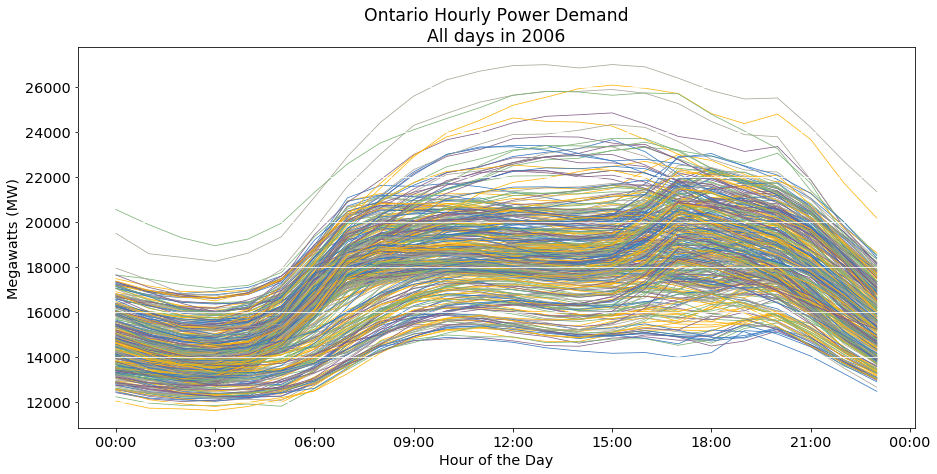

In [14]:
date_format = '%H:%M'
mdates_locator = mdates.HourLocator(interval=3)
labels = []
fig, ax = seasonal_plot(df2006_hoursindays,
                        labels=labels,
                        date_format=date_format,
                        mdates_locator=mdates_locator)
ax.set_title('Ontario Hourly Power Demand\nAll days in 2006')
ax.set_ylabel('Megawatts (MW)')
ax.set_xlabel('Hour of the Day')
plt.savefig('saved-images/ontario-hourly-power-demand-all-days-2006.PNG')
plt.show();

The chart shows a pattern where power demand starts increasing at around 6:00 AM. It levels off, and
stays level until about 4:00 PM. It kicks upwards at around 5:00 or 6:00 PM, before declining to a low at 3:00 AM

## What does power demand look like over a typical week?

We can combine our data for weekdays and hours of the day by plotting a heat map of the 168 hours in
a week, where higher average power demand shows as a higher intensity red.

In [15]:
df = df2006[['hour_of_day', 'day_of_week', 'hourly_demand']].copy(deep=True)
df.head()

,hour_of_day,day_of_week,hourly_demand
2006-01-01 00:00:00,0.0,6.0,15925.0
2006-01-01 01:00:00,1.0,6.0,15323.0
2006-01-01 02:00:00,2.0,6.0,14832.0
2006-01-01 03:00:00,3.0,6.0,14502.0
2006-01-01 04:00:00,4.0,6.0,14392.0


In [16]:
df_pivot = df.pivot_table(index='hour_of_day',
                         columns = 'day_of_week',
                         values='hourly_demand',
                         aggfunc='mean')

# Set up the indices with some arbitrary dates so we can use matplotlib auto labeling functionality
df_pivot.index = pd.Index(df2006['2006-01-01'].index, name='hours of all days')
df_pivot.sort_index(ascending=False, inplace=True)
df_pivot.rename(columns = {0:'Monday', 1: 'Tuesday', 2: 'Wednesday',
                          3: 'Thursday', 4: 'Friday',
                          5: 'Saturday', 6: 'Sunday'}, inplace=True)
df_pivot.head(25)

day_of_week,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
hours of all days,,,,,,,
2006-01-01 23:00:00,15794.942308,15835.788462,15729.288462,15724.942308,15390.788462,14794.173077,15038.377358
2006-01-01 22:00:00,16995.153846,17052.711538,16957.480769,16950.961538,16528.269231,15702.019231,15924.150943
2006-01-01 21:00:00,18318.153846,18441.307692,18296.384615,18260.250000,17737.692308,16559.000000,16903.811321
2006-01-01 20:00:00,19342.480769,19457.942308,19294.788462,19261.000000,18591.442308,17180.480769,17575.226415
2006-01-01 19:00:00,19682.480769,19815.057692,19683.673077,19611.576923,18975.538462,17427.115385,17744.113208
2006-01-01 18:00:00,19798.807692,19979.692308,19850.192308,19680.461538,19178.865385,17598.365385,17723.566038
2006-01-01 17:00:00,19863.076923,20061.346154,19948.673077,19709.769231,19318.057692,17629.961538,17666.603774
2006-01-01 16:00:00,19661.807692,19883.365385,19751.942308,19519.769231,19158.000000,17330.230769,17278.943396
2006-01-01 15:00:00,19361.884615,19628.653846,19526.653846,19298.942308,19015.750000,17043.942308,16899.245283


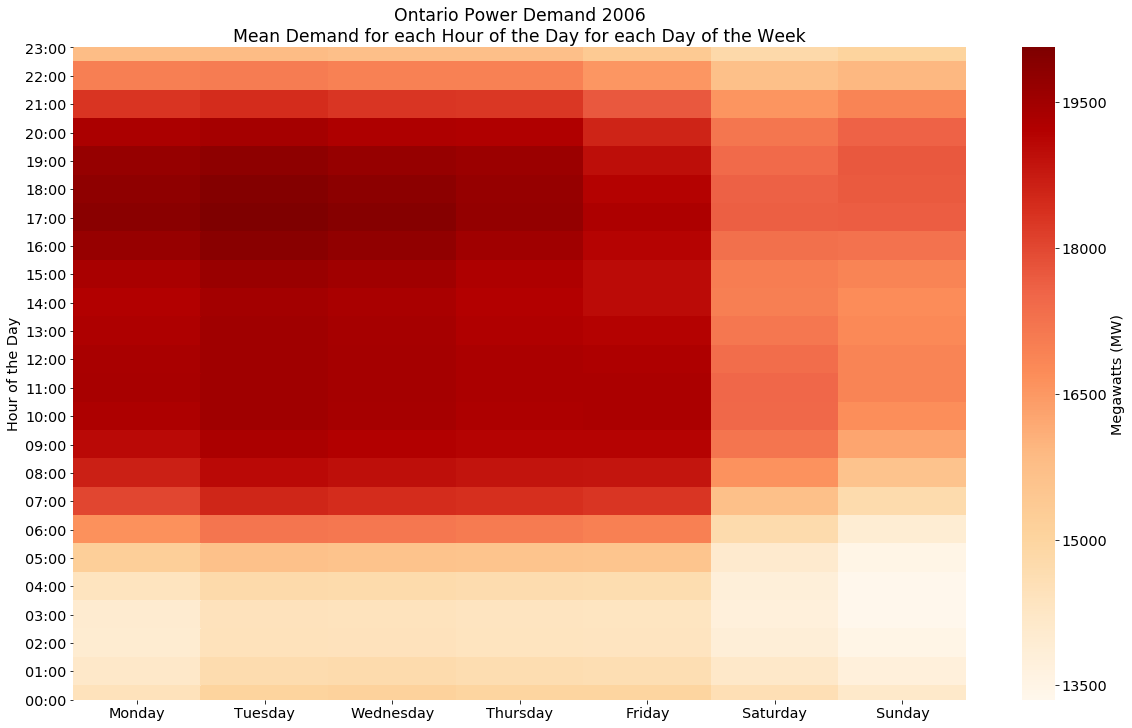

In [17]:
fig, ax1 = plt.subplots(frameon=False, figsize=(20,12))

ax1 = sns.heatmap(ax=ax1,
                  data = df_pivot,
                  cmap=palettable.colorbrewer.sequential.OrRd_9.mpl_colormap, # OrRd_9
                 cbar_kws={'label': 'Megawatts (MW)'}
                 )

ax1.set_yticklabels([i.strftime("%H:%M") for i in df_pivot.index], rotation=0)
ax1.set_ylabel('Hour of the Day')
ax1.set_xlabel('')
ax1.set_title('Ontario Power Demand 2006\nMean Demand for each Hour of the Day for each Day of the Week')
plt.savefig('saved-images/ontario-mean-power-demand-2006-hourofday-by-dayofweek-heatmap.PNG')
plt.show();

The heat map helps visualize the weekly and hourly demand cycles.

Clearly, weekdays between 4:00 PM and 8:00 PM tend to demand peak power, whereas the very early morning hours are low energy.

## Summary

+ Power demand is related to temperature, but not linearly. As the temperature gets above 15C, demand goes up. As the temperature goes lower than about 10C, demand also goes up. Demand seems to be more sharply associated with hotter temperatures.


+ Over a week, power demand is higher on week days than weekends. This is probably due to commercial activities driving higher demand.


+ Over a day, power demand hits a trough at around 3:00 AM, and increases during the day. It reaches higher levels between 9:00 AM and 8:00 PM, with peak demand between 4:00PM and 8:00 PM.